In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
%matplotlib inline 

In [32]:
frame = np.load("frameRGB_uint32.npy")
shape = frame.shape
shape, frame.dtype

((720, 1024), dtype('uint32'))

In [5]:
frame[0][0]

5198946

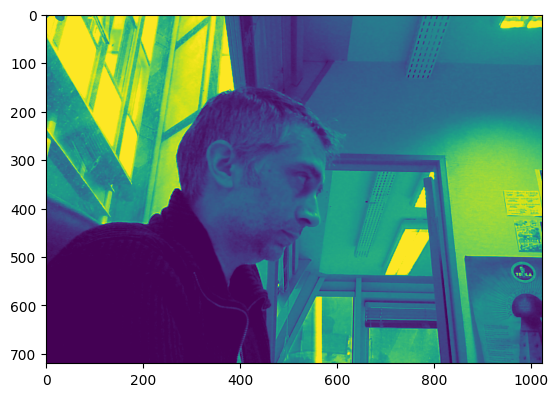

In [58]:
plt.imshow(frame)
plt.show()

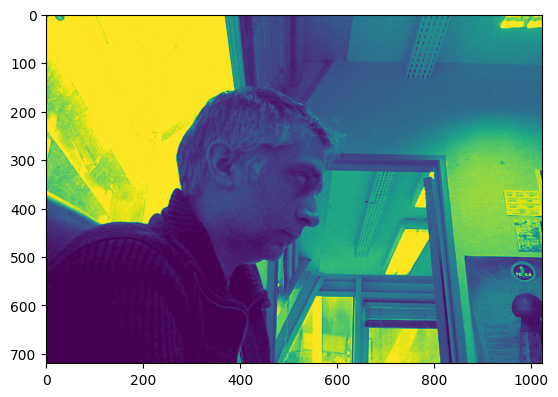

In [57]:
plt.imshow(frame.astype(np.uint8))
plt.show()

uint8


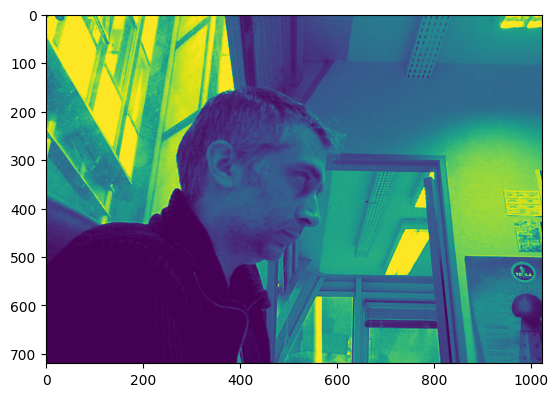

In [61]:
f = ((frame - np.min(frame)) / np.ptp(frame) * 255).astype(np.uint8)
print(f.dtype)
plt.imshow(f)
plt.show()

(720, 1024, 3) uint8 [79 84 98]


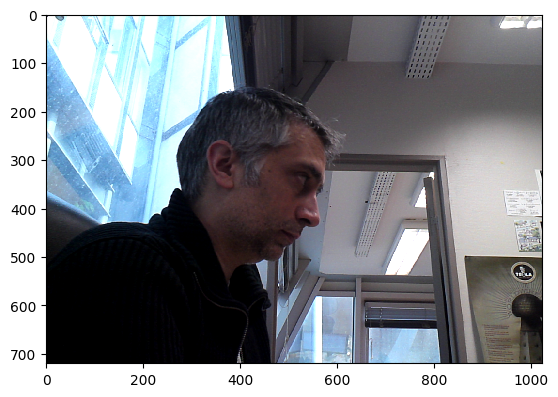

In [31]:
type_rgba = np.dtype((np.uint32, {'r':(np.uint8,0),'g':(np.uint8,1),'b':(np.uint8,2), 'a':(np.uint8,3)}))
rgb = frame.view(dtype=type_rgba)
rgb = np.stack([rgb['b'], rgb['g'], rgb['r']], axis=-1)

print(rgb.shape, rgb.dtype, rgb[0][1])
plt.imshow( rgb, interpolation='nearest')
plt.show()

(720, 1024, 3) uint8 [224  47  31]


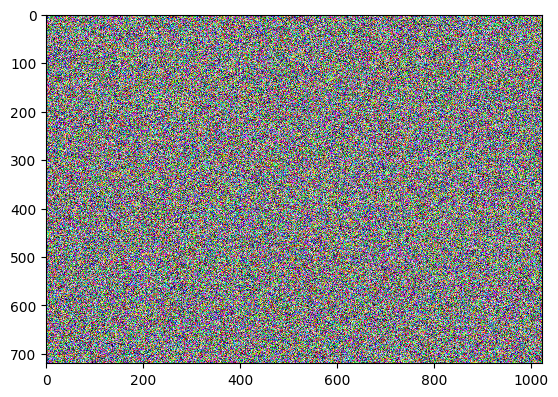

In [88]:
array = np.random.rand(*rgb.shape)
array *= 255
rgb = array.astype(np.uint8)
print(rgb.shape, rgb.dtype, rgb[0][1])
plt.imshow( rgb, interpolation='nearest')
plt.show()

786432 (768, 1024) uint16 30775


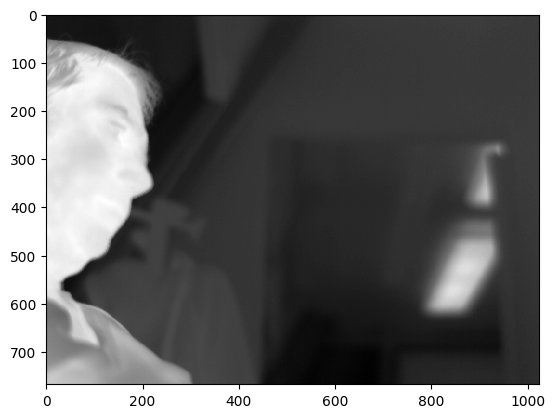

In [121]:
frameIR = np.load("frameIR_uint16.npy")
print(np.count_nonzero(frameIR),frameIR.shape, frameIR.dtype, frameIR[102][100])
plt.imshow(frameIR, interpolation='nearest',cmap='gray')

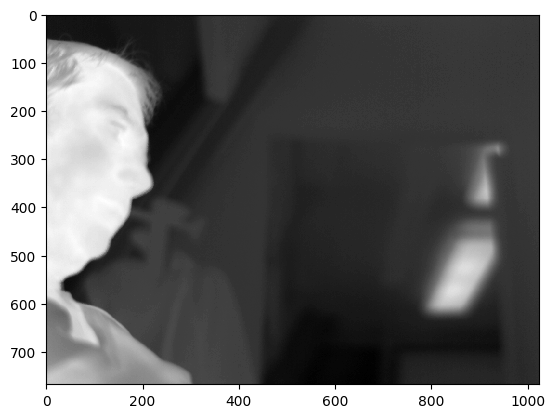

In [125]:
frameIRf = frameIR.astype(np.float16)
plt.imshow(frameIRf, interpolation='nearest',cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


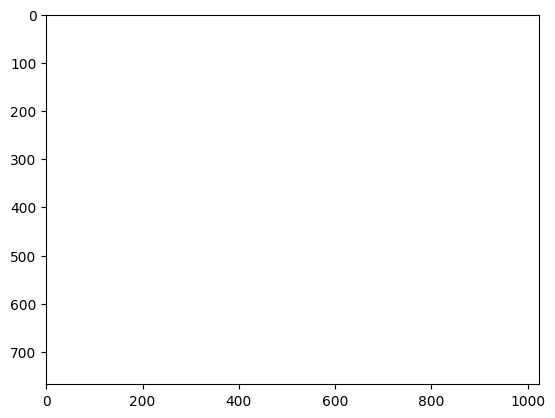

In [128]:
frameIR_rgb = cv2.cvtColor(frameIR, cv2.COLOR_GRAY2RGB)
plt.imshow(frameIR_rgb, interpolation='nearest',cmap='gray')
plt.show()